Insurance Fraud detection - Erkennung von Betrugsfällen bei Versicherungsansprüchen

Für jedes Versicherungs-Unternehmen ist wichtig nur begründete und gerechtfertigte Summen aus zuzahlen. Für Versicherungen ist daher eine Einschätzung der Legitimität von Schadensansprüchen, essentiell. Problematisch sind hierbei die gezielten Betrugsversuche (= Fraud). Soweit sich das Risiko Betrugs erkennen lässt, können Gegenmaßnahmen eingeleitet werden. Die Abschätzung der Wahrscheinlichkeit, mit der ein Kunde einen Betrug versucht, ist hierbei essentiell. Darüber hinaus stellt sich die Frage, anhand welcher Merkmale Betrugsversuche zu erkennen sind. Mit dieser Demo kann erkannt werden ob ein Versicherungsvorfall ein Betrug ist oder nicht. 

Der verwendete Datensatz besteht aus 1000 Sätzen und hat 40 verschiedene sogenannte Features, d.h. gesammelte Datenkategorien. Das bedeutet, dass die Datenbasis nicht sehr groß ist, dafür sind die Möglichkeiten, verschiedene Merkmale zu untersuchen, umso größer. Sie zeigt Informationen zu den Versicherungsnehmern, zu den Versicherungsdaten der Versicherten und ihrer Kraftfahrzeuge sowie zu Unfällen und Schadenshöhen. Die Zielvariable zeigt an, ob ein Versicherungsbetrug vorliegt ("fraud_reported"). Der Datensatz ist aufgrund der binären Zielvariable (später auch Ziel genannt) ein gutes Beispiel für Klassifikationsmodelle.    

Klassifizierungsmodelle sind vielfältig und umfassen zum Beispiel logistische Regression, Entscheidungsbaum, Random Forest und Support Vector Machines. Alle oben genannten Modelle wurden mit dem Datensatz getestet und anschließend wird das mit der Höchste Präzision genutzt. In diesem Fall ist das die Support Vector Machines 

Für die Bewertung der Qualität einer Klassifikation werden Metriken wir Accuracy (= allgemeine Genauigkeit der Klassifikation), Precision (= Präzision der Vorhersage der Kundenabwanderung) und Recall (= Menge der abwanderungswilligen Kunden die korrekt klassifiziert wurden) genutzt. In einer ersten Modellstufe wird eine Accuracy von 92%, ein Recall von 75% sowie eine Precision von 95% erreicht. Schlussendlich konnten 85% der Betrugsfälle korrekt erkannt werden.  

Die Umsetzung bzw. Einbindung des Datenmodells bietet sich in CRM-Systemen an. Auf Basis von Vorfalls Merkmalen kann automatisiert eine Vorhersage über eine potenziellen Betrugsversuch erstellt werden. Auf diese Weise lassen sich Betrugsfälle identifizieren, in Form von Dashboards visualisieren sowie teil-automatisiert bearbeiten.

# 1. Business Understanding

Versicherungen verfügen über eine Vielzahl von Daten und kreiren täglich neue. Unter diesen Daten sind auch sehr sensible Informationen wie Name, Geburtsdaten, Adressen und Kontoverbindung ihrer Versicherten. Diese Daten werden von den Versicherungsunternehmen zunehmend automatisiert verarbeitet, ausgewertet und für weitere Versicherungsprozesse genutzt. Dabei geht es natürlich nach wie vor darum, für bestehende Versicherungsprodukte das aktuelle Risiko zu berechnen und darauf aufbauend die Prämie und die mögliche Schadenshöhe zu ermitteln. Die Schaffung neuer, bedarfsgerechter Versicherungsprodukte, die kurzfristig abgeschlossen werden können und eine sehr kurze Laufzeit haben, ist ein weiterer Trend, der durch Daten unterstützt werden kann. Die zentralen Fragen hierbei sind natürlich: Welche Daten sind für die Aufdeckung von Versicherungsbetrug relevant? Wie müssen diese Daten strukturiert sein? Welches Modell ist am besten geeignet, um Versicherungsbetrug im Schadenfall vorherzusagen? Nach welchen Kriterien sollte man verschiedene ML-Modelle vergleichen? Wie zuverlässig funktioniert die Vorhersage von Versicherungsbetrug?

# 2. Datenverständnis

Der verwendete Datensatz besteht aus 1000 Sätzen und hat 40 verschiedene sogenannte Features, d.h. gesammelte Datenkategorien. Das bedeutet, dass die Datenbasis nicht sehr groß ist, dafür sind die Möglichkeiten, verschiedene Merkmale zu untersuchen, umso größer. Es werden Informationen zu Versicherungsnehmern, Vertragsdaten zu Versicherungsnehmern und deren Kraftfahrzeugen, sowie Unfälle und die Höhe der Schäden angezeigt. Da der Datensatz so viele Merkmale enthält, werden sie und ihre Beschreibungen in der folgenden Tabelle erläutert. Die Zielvariable zeigt an, ob ein Versicherungsbetrug vorliegt ("fraud_reported"). Der Datensatz ist ein gutes Beispiel für Klassifizierungsmodelle, da es sich um eine binäre Zielvariable handelt (später auch als Ziel bezeichnet).

## 2.1 Import von relevanten Modulen

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## 2.2 Daten einlesen

In [94]:
raw_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Insurance_Fraud_detection_dataset.csv')

## 2.3 Deskriptive Analyse

In [95]:
raw_data.shape

(1000, 40)

--> 1000 samples and 40 columns

Zunächst werden die Daten eingelesen und auf ihre Vollständigkeit überprüft. Danach werden die einzelnen Kundenmerkmale einer deskriptiven Analyse unterzogen. Damit lässt sich der Zusammenhang zur Zielvariable Betrug_Erkannt darstellen. In den Daten werden Untypische Daten ersetzt wie zum Beispiel „?“ mit „NaN“. Auf der Grundlage einer Korrelationsanalyse werden die Zusammenhänge zwischen Vorfalls-/Kundendaten und der Zielvariable untersucht. Merkmale die keinen Mehrwert bieten werden entfernt ( Alter, Adresse, usw.). Die Ausgewogenheit des Datensatzes in Bezug auf die Zielvariable wird grafisch dargestellt. Die Fälle in denen kein Betrug herscht machen etwa 75 % des gesamten Datensatzes aus, während Betrugsfälle etwa 25% ausmachen. Somit liegt ein unausgewogener Datensatz vor. Anschließend werden die kategorialen Werte umgewandelt (= Bildung von Dummy Variablen). Schließlich werden alle Kundenmerkmale auf ein gemeinsames Messniveau gebracht (= Standardisierung). Durch ein Undersampling wird die Unausgewogenheit des Datensatzes ausgeglichen. Abschließend werden Trainings- und Testdaten gebildet.

In [96]:
raw_data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [97]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# 3. Datenaufbereitung

## 3.1 Datenbereinigung

In [98]:
# replace "?" with "NaN" in the dataset
raw_data.replace('?', np.nan, inplace=True)

In [99]:
# checking missing values
raw_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [100]:
# delete column _c39, no relevant feature
data_no_mv = raw_data.drop('_c39', axis=1)
data_no_mv.shape

(1000, 39)

In [101]:
# since there are relatively few records anyway, the zero values are replaced by the mean value of the respective column
print(data_no_mv['collision_type'].mode()[0])
print(data_no_mv['property_damage'].mode()[0])
print(data_no_mv['police_report_available'].mode()[0])

Rear Collision
NO
NO


In [102]:
data_no_mv['collision_type'] = data_no_mv['collision_type'].fillna(data_no_mv['collision_type'].mode()[0])
data_no_mv['property_damage'] = data_no_mv['property_damage'].fillna(data_no_mv['property_damage'].mode()[0])
data_no_mv['police_report_available'] = data_no_mv['police_report_available'].fillna(data_no_mv['police_report_available'].mode()[0])

In [103]:
# checking missing values
data_no_mv.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [104]:
# checking duplicates
data_no_dup = data_no_mv.copy()
data_no_dup['policy_number'] = data_no_dup['policy_number'].duplicated(keep=False)

In [105]:
data_no_dup.shape

(1000, 39)

In [106]:
data_no_dup.describe(include='all')

months_as_customer          age policy_number policy_bind_date  \
count          1000.000000  1000.000000          1000             1000   
unique                 NaN          NaN             1              951   
top                    NaN          NaN         False       2006-01-01   
freq                   NaN          NaN          1000                3   
mean            203.954000    38.948000           NaN              NaN   
std             115.113174     9.140287           NaN              NaN   
min               0.000000    19.000000           NaN              NaN   
25%             115.750000    32.000000           NaN              NaN   
50%             199.500000    38.000000           NaN              NaN   
75%             276.250000    44.000000           NaN              NaN   
max             479.000000    64.000000           NaN              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip  ...    witnesses  \
count     1.000000e+03    1000.000000  ...  1000.000000   
unique             NaN            NaN  ...          NaN   
top                NaN            NaN  ...          NaN   
freq               NaN            NaN  ...          NaN   
mean      1.101000e+06  501214.488000  ...     1.487000   
std       2.297407e+06   71701.610941  ...     1.111335   
min      -1.000000e+06  430104.000000  ...     0.000000   
25%       0.000000e+00  448404.500000  ...     1.000000   
50%       0.000000e+00  466445.500000  ...     1.000000   
75%       0.000000e+00  603251.000000  ...     2.000000   
max       1.000000e+07  620962.000000  ...     3.000000   

       police_report_available total_claim_amount  injury_claim  \
count                     1000         1000.00000   1000.000000   
unique                       2                NaN           NaN   
top                         NO                NaN           NaN   
freq                       686                NaN           NaN   
mean                       NaN        52761.94000   7433.420000   
std                        NaN        26401.53319   4880.951853   
min                        NaN          100.00000      0.000000   
25%                        NaN        41812.50000   4295.000000   
50%                        NaN        58055.00000   6775.000000   
75%                        NaN        70592.50000  11305.000000   
max                        NaN       114920.00000  21450.000000   

       property_claim  vehicle_claim  auto_make auto_model    auto_year  \
count     1000.000000    1000.000000       1000       1000  1000.000000   
unique            NaN            NaN         14         39          NaN   
top               NaN            NaN       Saab        RAM          NaN   
freq              NaN            NaN         80         43          NaN   
mean      7399.570000   37928.950000        NaN        NaN  2005.103000   
std       4824.726179   18886.252893        NaN        NaN     6.015861   
min          0.000000      70.000000        NaN        NaN  1995.000000   
25%       4445.000000   30292.500000        NaN        NaN  2000.000000   
50%       6750.00

In [107]:
# map the target from "no" and "yes" to 0 and 1
data_no_dup.fraud_reported = data_no_dup.fraud_reported.map({'N': 0, 'Y': 1})

In [108]:
data_no_dup.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48          False       2014-10-17           OH   
1                 228   42          False       2006-06-27           IN   
2                 134   29          False       2000-09-06           OH   
3                 256   41          False       1990-05-25           IL   
4                 228   44          False       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                      NO               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              1  
1              1  
2              0  
3              1  
4              0  

[5 rows x 39 columns]

## 3.2 Test auf Korrelation

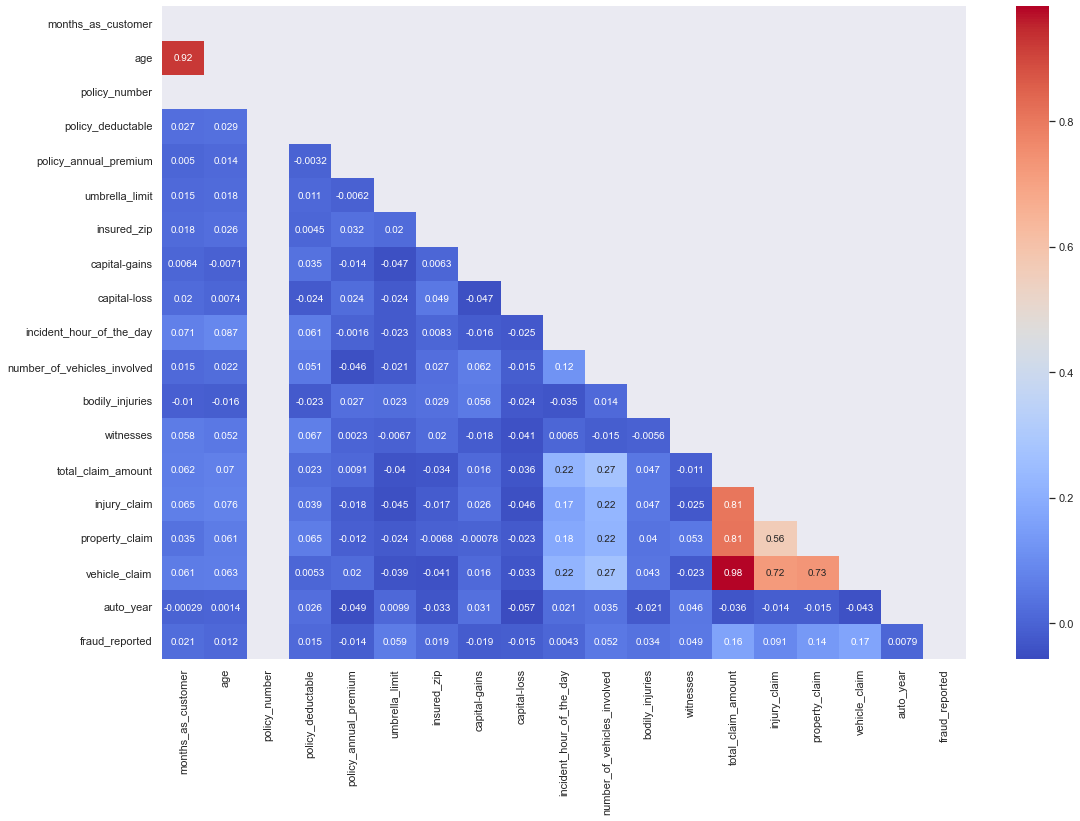

In [109]:
# checking correlation
plt.figure(figsize=(18, 12))

feature_corr = data_no_dup.corr()
mask = np.triu(np.ones_like(feature_corr, dtype = bool))
sns.heatmap(feature_corr, mask=mask, annot=True, cmap='coolwarm')

plt.show()

--> hohe Korrelation zwischen *Alter* und *Monate_als_Kunde*, auch zwischen *Gesamtschadenshöhe* und *Verletzungsschaden, Sachschaden und Fahrzeugschaden*. 

In [110]:
# drop features because of the correlation 
cols_to_drop = ['age', 'total_claim_amount', 'policy_number', 'policy_bind_date', 'policy_state', 
                'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 
                'insured_zip'] 
data01 = data_no_dup.drop(cols_to_drop, axis=1)
data01.shape

(1000, 29)

In [111]:
# seperate numeric and categorical feature
data_cat = data01.select_dtypes(include='object')
data_num = data01.select_dtypes(exclude='object')

In [112]:
data_cat.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_hobbies insured_relationship incident_date  \
0        sleeping              husband    2015-01-25   
1         reading       other-relative    2015-01-21   
2     board-games            own-child    2015-02-22   
3     board-games            unmarried    2015-01-10   
4     board-games            unmarried    2015-02-17   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted property_damage police_report_available  auto_make  \
0                Police             YES                     YES       Saab   
1                Police              NO                      NO   Mercedes   
2                Police              NO                      NO      Dodge   
3                Police              NO                      NO  Chevrolet   
4                  None              NO                      NO     Accura   

  auto_model  
0        92x  
1       E400  
2        RAM  
3      Tahoe  
4        RSX

## 3.2 Überprüfung der Merkmale in Bezug auf das Ziel

In [113]:
data_cat = pd.concat([data_cat, data_num.fraud_reported], axis=1)
data_cat.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_hobbies insured_relationship incident_date  \
0        sleeping              husband    2015-01-25   
1         reading       other-relative    2015-01-21   
2     board-games            own-child    2015-02-22   
3     board-games            unmarried    2015-01-10   
4     board-games            unmarried    2015-02-17   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted property_damage police_report_available  auto_make  \
0                Police             YES                     YES       Saab   
1                Police              NO                      NO   Mercedes   
2                Police              NO                      NO      Dodge   
3                Police              NO                      NO  Chevrolet   
4                  None              NO                      NO     Accura   

  auto_model  fraud_reported  
0        92x               1  
1       E400               1  
2        RAM               0  
3      Tahoe               1  
4        RSX               0

In [114]:
data_cat.incident_date.loc[data_cat.fraud_reported == 1]

0      2015-01-25
1      2015-01-21
3      2015-01-10
5      2015-01-02
14     2015-01-15
          ...    
974    2015-02-08
977    2015-02-21
982    2015-01-01
986    2015-02-19
987    2015-01-13
Name: incident_date, Length: 247, dtype: object

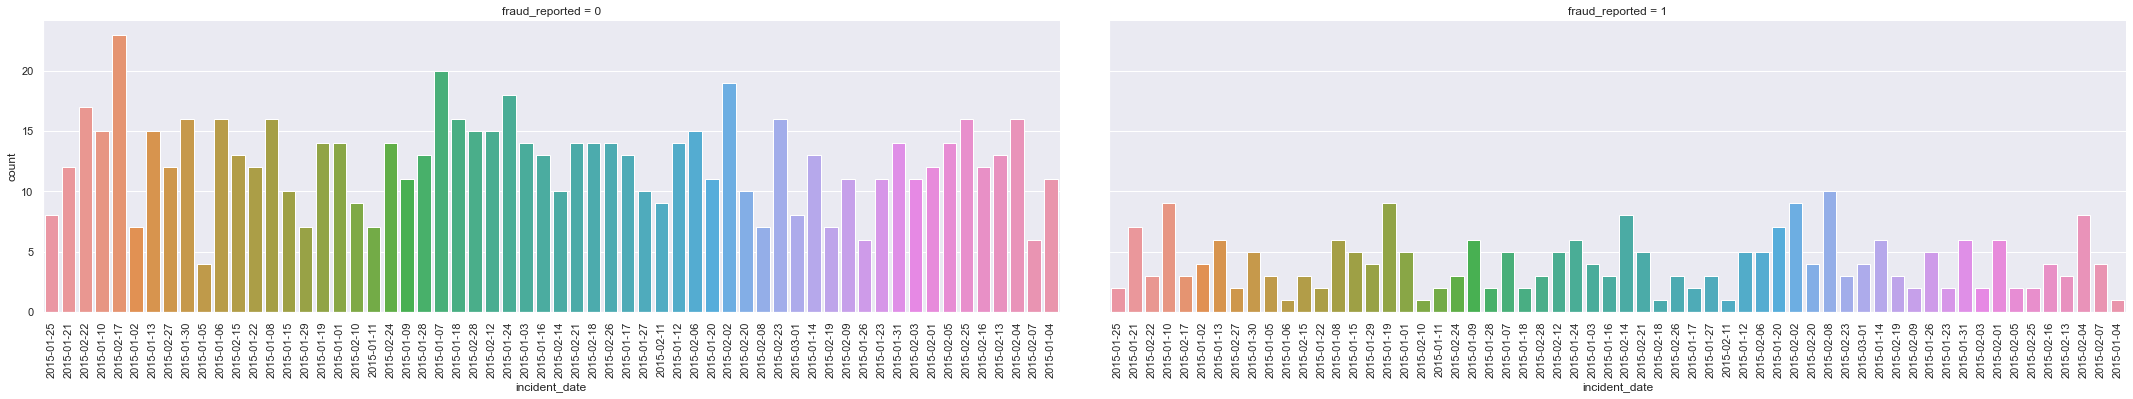

In [115]:
# data_cat.incident_date.values
chart = sns.catplot(x="incident_date", col="fraud_reported", data=data_cat, kind="count", aspect=3)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 1728x1728 with 0 Axes>

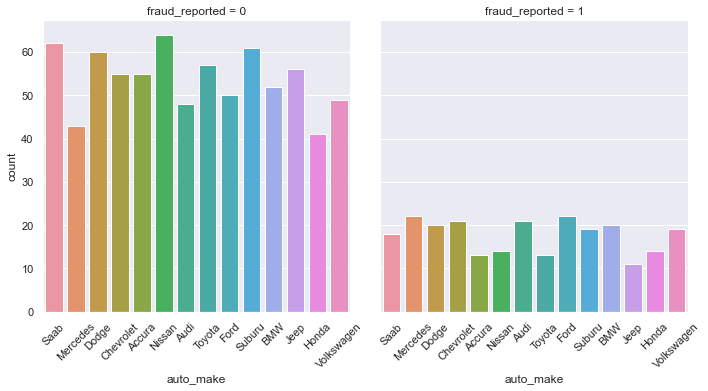

In [116]:
plt.figure(figsize=(24, 24))
chart = sns.catplot(x="auto_make", col="fraud_reported", data=data_cat, kind="count")
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 2304x2304 with 0 Axes>

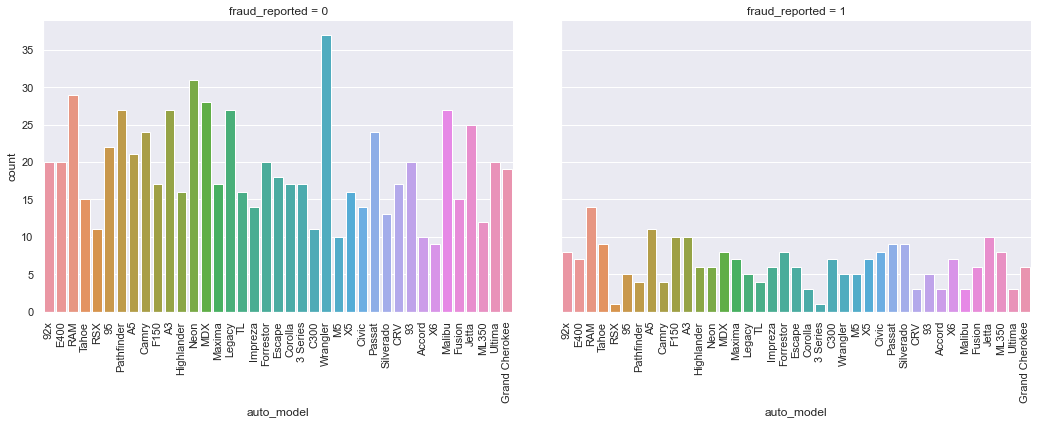

In [117]:
plt.figure(figsize=(32, 32))
chart = sns.catplot(x="auto_model", col="fraud_reported", data=data_cat, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 2304x2304 with 0 Axes>

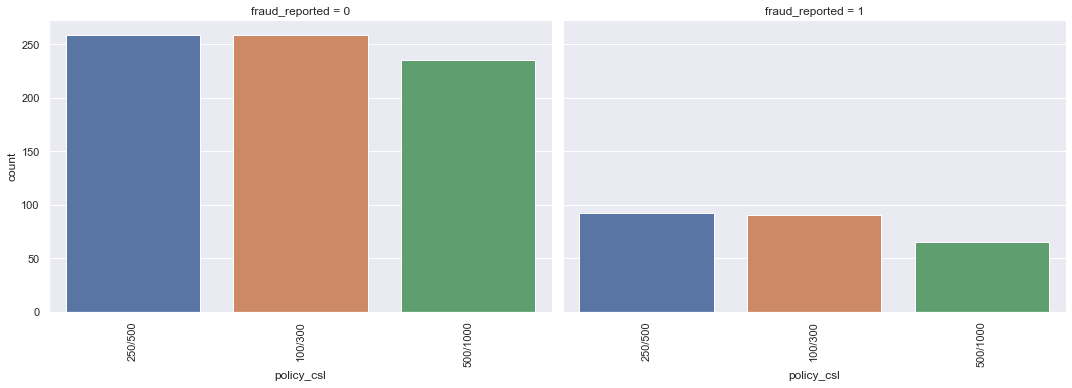

In [118]:
plt.figure(figsize=(32, 32))
chart = sns.catplot(x="policy_csl", col="fraud_reported", data=data_cat, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

In [119]:
data_cat[['policy_csl', 'fraud_reported']].groupby(['policy_csl'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


policy_csl  fraud_reported
1    250/500        0.262108
0    100/300        0.257880
2   500/1000        0.216667

In [120]:
data_cat[['insured_hobbies', 'fraud_reported']].groupby(['insured_hobbies'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


insured_hobbies  fraud_reported
5            chess        0.826087
6        cross-fit        0.742857
19        yachting        0.301887
2      board-games        0.291667
14            polo        0.276596
15         reading        0.265625
0     base-jumping        0.265306
10          hiking        0.230769
13       paintball        0.228070
16       skydiving        0.224490
18     video-games        0.200000
17        sleeping        0.195122
8         exercise        0.192982
1       basketball        0.176471
12          movies        0.163636
3   bungie-jumping        0.160714
7          dancing        0.116279
9             golf        0.109091
11        kayaking        0.092593
4          camping        0.090909

In [121]:
data_cat[['insured_occupation', 'fraud_reported']].groupby(['insured_occupation'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


insured_occupation  fraud_reported
3     exec-managerial        0.368421
4     farming-fishing        0.301887
2        craft-repair        0.297297
13   transport-moving        0.291667
12       tech-support        0.282051
11              sales        0.276316
1        armed-forces        0.246377
6   machine-op-inspct        0.236559
10    protective-serv        0.222222
9      prof-specialty        0.211765
5   handlers-cleaners        0.203704
0        adm-clerical        0.169231
7       other-service        0.169014
8     priv-house-serv        0.169014

In [122]:
data_cat[['insured_education_level', 'fraud_reported']].groupby(['insured_education_level'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


insured_education_level  fraud_reported
6                     PhD        0.264000
4                      MD        0.263889
1                 College        0.262295
3                      JD        0.260870
0               Associate        0.234483
2             High School        0.225000
5                 Masters        0.223776

In [123]:
# drop not relevant features
data_cat.drop(['incident_date', 'auto_make', 'auto_model'], axis=1, inplace=True)

In [124]:
data_cat.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_hobbies insured_relationship             incident_type  \
0        sleeping              husband  Single Vehicle Collision   
1         reading       other-relative             Vehicle Theft   
2     board-games            own-child   Multi-vehicle Collision   
3     board-games            unmarried  Single Vehicle Collision   
4     board-games            unmarried             Vehicle Theft   

    collision_type incident_severity authorities_contacted property_damage  \
0   Side Collision      Major Damage                Police             YES   
1   Rear Collision      Minor Damage                Police              NO   
2   Rear Collision      Minor Damage                Police              NO   
3  Front Collision      Major Damage                Police              NO   
4   Rear Collision      Minor Damage                  None              NO   

  police_report_available  fraud_reported  
0                     YES               1  
1                      NO               1  
2                      NO               0  
3                      NO               1  
4                      NO               0

In [125]:
data_num.head()

months_as_customer  policy_deductable  policy_annual_premium  \
0                 328               1000                1406.91   
1                 228               2000                1197.22   
2                 134               2000                1413.14   
3                 256               2000                1415.74   
4                 228               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   
2         5000000          35100             0                            3   
3         6000000          48900        -62400                            1   
4         6000000          66000        -46000                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                1          2          6510           13020          52080   
1                0          0           780             780           3510   
2                2          3          7700            3850          23100   
3                1          2          6340            6340          50720   
4                0          1          1300             650           4550   

   auto_year  fraud_reported  
0       2004               1  
1       2007               1  
2       2007               0  
3       2014               1  
4       2009               0

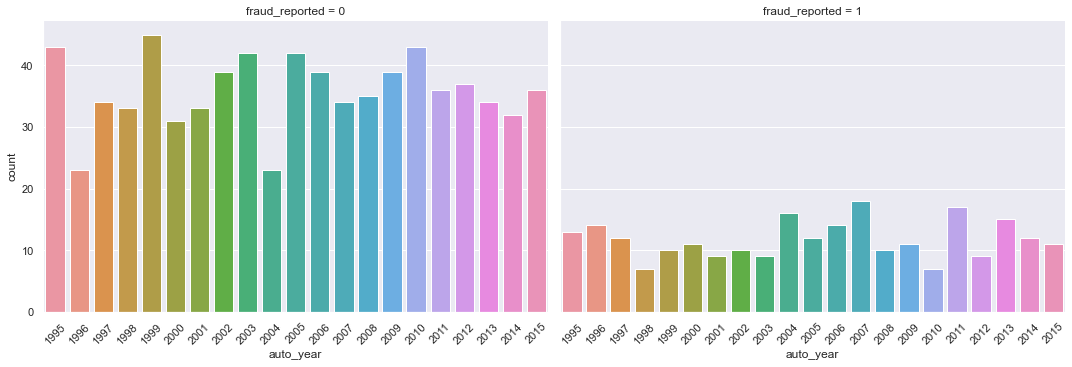

In [126]:
chart = sns.catplot(x="auto_year", col="fraud_reported", data=data_num, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

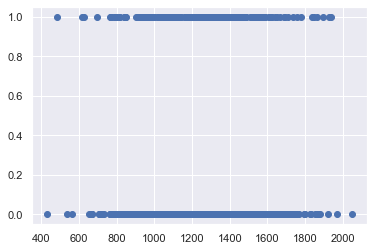

In [127]:
plt.scatter(data_num.policy_annual_premium, data_num.fraud_reported)

plt.show()

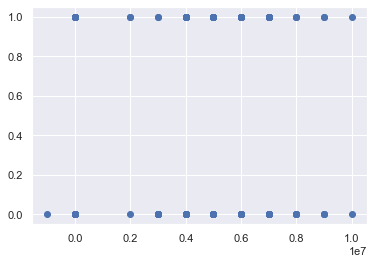

In [155]:
plt.scatter(data_num.umbrella_limit, data_num.fraud_reported)

plt.show()

## 3.3 Merkmal Technik
### neues Merkmal mit prozentualem Anteil des bezahlten Schadens (ohne Selbstbeteiligung)

In [156]:
# Preparation
# data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)
data_num['total_claims'] = data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)
data_num.head()

C:\Users\LOMIKU~1\AppData\Local\Temp/ipykernel_29168/644168615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['total_claims'] = data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)


months_as_customer  policy_deductable  policy_annual_premium  \
0                 328               1000                1406.91   
1                 228               2000                1197.22   
2                 134               2000                1413.14   
3                 256               2000                1415.74   
4                 228               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   
2         5000000          35100             0                            3   
3         6000000          48900        -62400                            1   
4         6000000          66000        -46000                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                1          2          6510           13020          52080   
1                0          0           780             780           3510   
2                2          3          7700            3850          23100   
3                1          2          6340            6340          50720   
4                0          1          1300             650           4550   

   fraud_reported  pct_paid_insurance  total_claims  
0               1            0.986035         71610  
1               1            0.605523          5070  
2               0            0.942280         34650  
3               1            0.968454         63400  
4               0            0.846154          6500

In [157]:
# add new feature
data_num['pct_paid_insurance'] = (data_num.total_claims - data_num.policy_deductable) / data_num.total_claims 

C:\Users\LOMIKU~1\AppData\Local\Temp/ipykernel_29168/4156420314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['pct_paid_insurance'] = (data_num.total_claims - data_num.policy_deductable) / data_num.total_claims


In [158]:
data_num.pct_paid_insurance

0      0.986035
1      0.605523
2      0.942280
3      0.968454
4      0.846154
         ...   
995    0.988532
996    0.990782
997    0.992593
998    0.957429
999    0.802372
Name: pct_paid_insurance, Length: 1000, dtype: float64

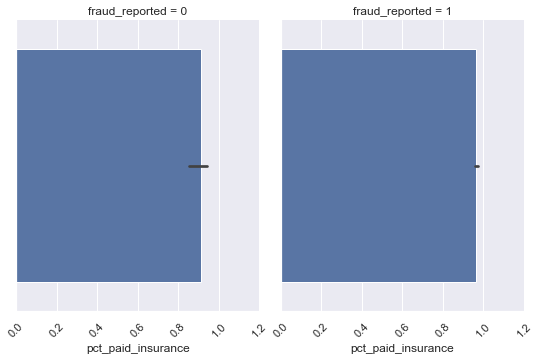

In [159]:
chart = sns.catplot(x="pct_paid_insurance", col="fraud_reported", data=data_num, kind="bar", aspect=0.75)
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

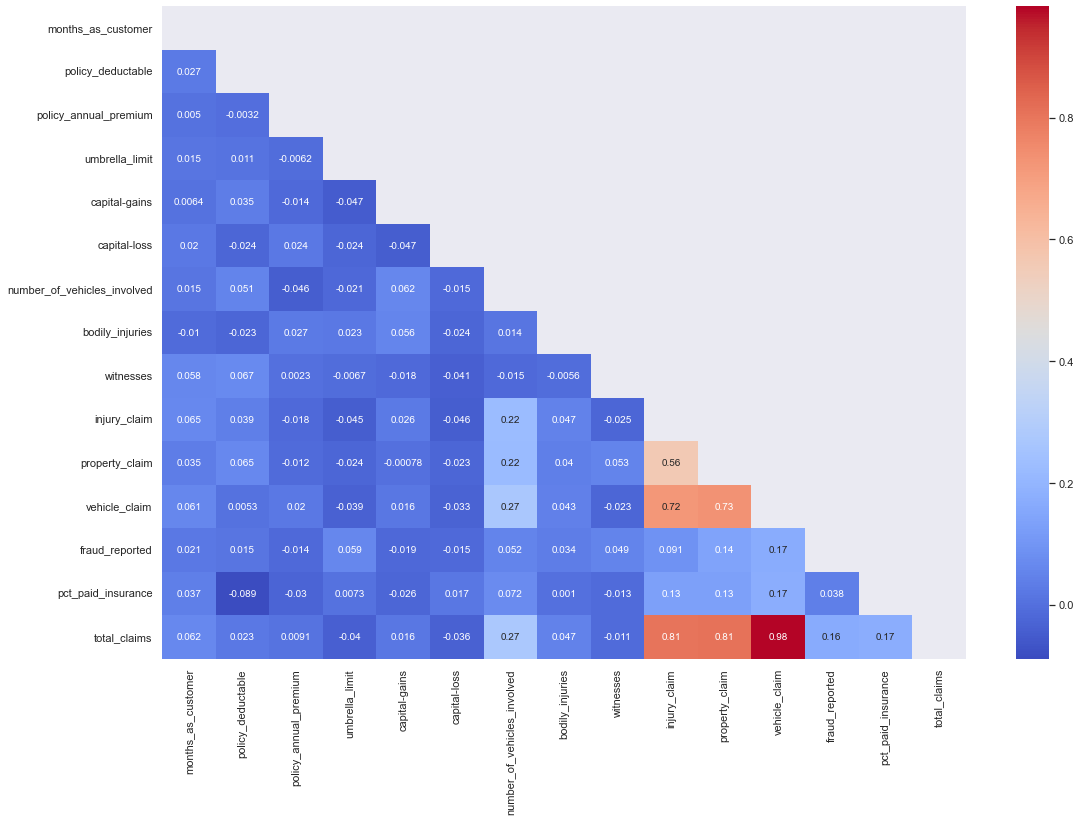

In [160]:
# checking correlation with the new feature
plt.figure(figsize=(18, 12))

feature_corr = data_num.corr()
mask = np.triu(np.ones_like(feature_corr, dtype = bool))
sns.heatmap(feature_corr, mask=mask, annot=True, cmap='coolwarm')

plt.show()

In [161]:
# drop not relevant features
data_num.drop(['auto_year', 'total_claims'], axis=1, inplace=True)

KeyError: "['auto_year'] not found in axis"

In [ ]:
data_num.head()

In [ ]:
data_cat.describe(include='all')

In [ ]:
data_num.describe()

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data_num.columns:
    if plotnumber <= data_num.shape[1]:
        ax = plt.subplot(5, 5, plotnumber)
        sns.displot(data_num[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
print(data_num.fraud_reported.value_counts())
plt.pie(data_num.fraud_reported.value_counts(), labels=['No Fraud', 'Fraud'], autopct='%.1f', 
        startangle=90, explode=[0, 0.05], colors=['#7ed6df', '#ffbe76'], textprops={'fontsize': 12})

--> Es handelt sich um einen unausgewogenen Datensatz.

## 3.4 Dummy-Variablen erstellen

## 3.4 Dummy-Variablen erstellen

In [162]:
# create dummy variables
data_cat.drop('fraud_reported', axis=1, inplace=True)
dummies = pd.get_dummies(data_cat, drop_first=True)

KeyError: "['fraud_reported'] not found in axis"

In [163]:
dummies.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 60 columns]

In [164]:
data_preprocessed = pd.concat([dummies, data_num], axis=1)
data_preprocessed.shape

(1000, 75)

In [165]:
data_preprocessed.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  capital-loss  \
0                                0  ...             0   
1                                0  ...             0   
2                                0  ...             0   
3                                1  ...        -62400   
4                                0  ...        -46000   

   number_of_vehicles_involved  bodily_injuries  witnesses  injury_claim  \
0                            1                1          2          6510   
1                            1                0          0           780   
2                            3                2          3          7700   
3                            1                1          2          6340   
4                            1                0          1          1300   

   property_claim  vehicle_claim  fraud_reported  pct_paid_insurance  \
0           13020          52080               1            0.986035   
1             780           3510               1            0.605523   
2            3850          23100               0            0.942280   
3            6340          50720               1            0.968454   
4             650           4550               0            0.846154   

   total_claims  
0         71610  
1          5070  
2         34650  
3         63400  
4          6500  

[5 rows x 75 columns]

data_preprocessed.to_csv('dataset_dummies', index=False)

# 4.0 Modellierung

## 4.1 Import von relevanten Modulen

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 4.2 Daten einlesen

In [167]:
data = data_preprocessed #pd.read_csv('dataset_dummies.csv') # file is generated in notebook_1

In [168]:
data.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  capital-loss  \
0                                0  ...             0   
1                                0  ...             0   
2                                0  ...             0   
3                                1  ...        -62400   
4                                0  ...        -46000   

   number_of_vehicles_involved  bodily_injuries  witnesses  injury_claim  \
0                            1                1          2          6510   
1                            1                0          0           780   
2                            3                2          3          7700   
3                            1                1          2          6340   
4                            1                0          1          1300   

   property_claim  vehicle_claim  fraud_reported  pct_paid_insurance  \
0           13020          52080               1            0.986035   
1             780           3510               1            0.605523   
2            3850          23100               0            0.942280   
3            6340          50720               1            0.968454   
4             650           4550               0            0.846154   

   total_claims  
0         71610  
1          5070  
2         34650  
3         63400  
4          6500  

[5 rows x 75 columns]

## 4.3 Datenvorbereitung für die Modellierung

In [169]:
target = data.fraud_reported
features = data.drop('fraud_reported', axis=1)

In [170]:
# Split data in training and test datasets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=365)

In [171]:
x_train.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
908                   1                    0                 1   
591                   0                    1                 0   
836                   0                    0                 0   
145                   0                    0                 0   
606                   0                    1                 0   

     insured_education_level_College  insured_education_level_High School  \
908                                0                                    0   
591                                0                                    0   
836                                0                                    0   
145                                0                                    0   
606                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
908                           0                           1   
591                           0                           0   
836                           1                           0   
145                           0                           0   
606                           0                           0   

     insured_education_level_Masters  insured_education_level_PhD  \
908                                0                            0   
591                                0                            0   
836                                0                            0   
145                                0                            0   
606                                0                            0   

     insured_occupation_armed-forces  ...  capital-gains  capital-loss  \
908                                0  ...          52600             0   
591                                1  ...              0             0   
836                                0  ...          52100             0   
145                                0  ...              0        -57900   
606                                0  ...              0        -66200   

     number_of_vehicles_involved  bodily_injuries  witnesses  injury_claim  \
908                            1                1          0           500   
591                            1                2          1          7270   
836                            1                0          1         21330   
145                            1                2          1          7640   
606                            1                0          3          5750   

     property_claim  vehicle_claim  pct_paid_insurance  total_claims  
908             500           4500            0.636364          5500  
591           21810          50890            0.993748         79970  
836            7110          56880            0.988279         85320  
145           15280          76400            0.994966         99320  
606            5750          46000            0.982609         57500  

[5 rows x 74 columns]

In [172]:
# Scale data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [173]:
# distribution of target in train data
y_train.value_counts()

0    596
1    204
Name: fraud_reported, dtype: int64

In [174]:
# distribution of target in test datat
y_test.value_counts()

0    157
1     43
Name: fraud_reported, dtype: int64

# 4.4 Modellierung und Evaluation

### 4.4.1 Logistische Regression

In [175]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [176]:
# train data
print(classification_report(y_train, logreg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       596
           1       0.79      0.75      0.77       204

    accuracy                           0.89       800
   macro avg       0.85      0.84      0.85       800
weighted avg       0.88      0.89      0.88       800



In [63]:
# train data
print('Accuracy:', accuracy_score(y_train, logreg.predict(x_train))*100)
print('Precision:', precision_score(y_train, logreg.predict(x_train))*100)
print('Recall:', recall_score(y_train, logreg.predict(x_train))*100)

Accuracy: 88.5
Precision: 78.8659793814433
Recall: 75.0


In [64]:
# test data
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       157
           1       0.67      0.65      0.66        43

    accuracy                           0.85       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.85      0.85      0.85       200



In [65]:
# test data
print('Accuracy:', accuracy_score(y_test, logreg.predict(x_test))*100)
print('Precision:', precision_score(y_test, logreg.predict(x_test))*100)
print('Recall:', recall_score(y_test, logreg.predict(x_test))*100)

Accuracy: 85.5
Precision: 66.66666666666666
Recall: 65.11627906976744


In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg.predict(x_test)).ravel() 
print(tn, fp, fn, tp)

143 14 15 28


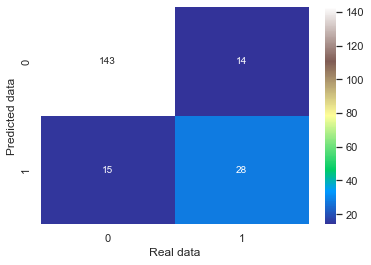

In [67]:
cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

In [68]:
logreg.intercept_

array([-1.87199801])

In [69]:
logreg.coef_

array([[ 5.80290586e-02, -2.37429629e-01, -3.18975936e-02,
         1.03264901e-01,  1.57395846e-02,  1.54412249e-01,
         9.98550038e-02,  1.01734974e-01,  1.65847423e-01,
         7.04430787e-02,  2.21983720e-01,  2.75034627e-01,
         6.08030524e-02, -8.57181314e-02,  6.39780307e-02,
        -1.53624306e-01, -4.61802683e-02,  1.51000581e-01,
        -5.51566389e-02,  5.90062519e-02, -8.83889618e-03,
        -8.20083809e-03, -1.42216723e-01,  1.90073855e-02,
        -2.16204990e-01, -4.62653155e-01,  7.95035036e-01,
         5.66640168e-01, -3.05200290e-01, -2.31887634e-01,
        -8.43891138e-02, -9.43983125e-02, -3.03973994e-01,
        -9.70096772e-02, -2.00177795e-01, -5.26322421e-02,
        -1.90789105e-02, -1.19299001e-01, -2.22788639e-01,
         8.18201612e-03,  2.03631238e-01,  3.87350193e-01,
         4.07693675e-01, -2.79170918e-02,  2.25397475e-01,
         1.85538456e-01, -1.95996214e-01, -1.87436352e-01,
        -2.87031385e-01,  1.41595895e-01, -1.11191352e-0

### 4.4.2 Entscheidungsbaum

In [70]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
# train data
print(classification_report(y_train, tree.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       204

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [72]:
# train data
print('Accuracy:', accuracy_score(y_train, tree.predict(x_train))*100)
print('Precision:', precision_score(y_train, tree.predict(x_train))*100)
print('Recall:', recall_score(y_train, tree.predict(x_train))*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


In [73]:
# test data
print(classification_report(y_test, tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       157
           1       0.42      0.42      0.42        43

    accuracy                           0.75       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.75      0.75      0.75       200



In [74]:
# test data
print('Accuracy:', accuracy_score(y_test, tree.predict(x_test))*100)
print('Precision:', precision_score(y_test, tree.predict(x_test))*100)
print('Recall:', recall_score(y_test, tree.predict(x_test))*100)

Accuracy: 75.0
Precision: 41.86046511627907
Recall: 41.86046511627907


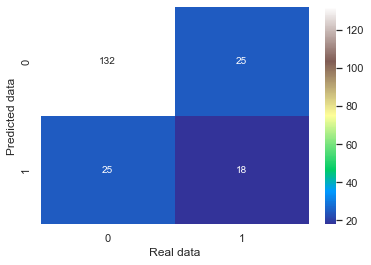

In [75]:
cm = confusion_matrix(y_test, tree.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

### 4.4.3 Random Forest

In [76]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [77]:
# train data
print(classification_report(y_train, forest.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       204

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [78]:
# train data
print('Accuracy:', accuracy_score(y_train, forest.predict(x_train))*100)
print('Precision:', precision_score(y_train, forest.predict(x_train))*100)
print('Recall:', recall_score(y_train, forest.predict(x_train))*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0


In [79]:
# test data
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       157
           1       0.65      0.40      0.49        43

    accuracy                           0.82       200
   macro avg       0.75      0.67      0.69       200
weighted avg       0.81      0.82      0.81       200



In [80]:
# test data
print('Accuracy:', accuracy_score(y_test, forest.predict(x_test))*100)
print('Precision:', precision_score(y_test, forest.predict(x_test))*100)
print('Recall:', recall_score(y_test, forest.predict(x_test))*100)

Accuracy: 82.5
Precision: 65.38461538461539
Recall: 39.53488372093023


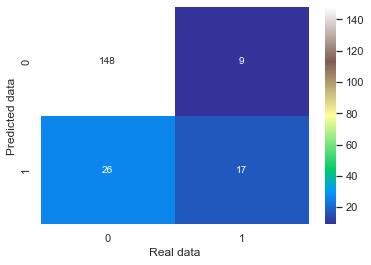

In [81]:
cm = confusion_matrix(y_test, forest.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

### 4.4.4 Support Vector Machine

In [82]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [83]:
# train data
print(classification_report(y_train, svc.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       596
           1       0.95      0.75      0.84       204

    accuracy                           0.93       800
   macro avg       0.94      0.87      0.90       800
weighted avg       0.93      0.93      0.92       800



In [84]:
# train data
print('Accuracy:', accuracy_score(y_train, svc.predict(x_train))*100)
print('Precision:', precision_score(y_train, svc.predict(x_train))*100)
print('Recall:', recall_score(y_train, svc.predict(x_train))*100)

Accuracy: 92.625
Precision: 95.03105590062113
Recall: 75.0


Für die Bewertung der Qualität einer Klassifikation werden Metriken wir Accuracy (= allgemeine Genauigkeit der Klassifikation), Precision (= Präzision der Vorhersage der Kundenabwanderung) und Recall (= Menge der abwanderungswilligen Kunden die korrekt klassifiziert wurden) genutzt. In einer ersten Modellstufe wird eine Accuracy von 92%, ein Recall von 75% sowie eine Precision von 95% erreicht. Schlussendlich konnten 85% der Betrugsfälle korrekt erkannt werden.  

In [85]:
# test data
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       157
           1       0.89      0.37      0.52        43

    accuracy                           0.85       200
   macro avg       0.87      0.68      0.72       200
weighted avg       0.86      0.85      0.83       200



In [86]:
# test data
print('Accuracy:', accuracy_score(y_test, svc.predict(x_test))*100)
print('Precision:', precision_score(y_test, svc.predict(x_test))*100)
print('Recall:', recall_score(y_test, svc.predict(x_test))*100)

Accuracy: 85.5
Precision: 88.88888888888889
Recall: 37.2093023255814


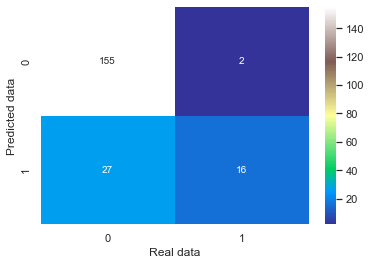

In [87]:
cm = confusion_matrix(y_test, svc.predict(x_test))
sns.heatmap(cm, annot=True, cmap='terrain', fmt='g')
plt.xlabel('Real data')
plt.ylabel('Predicted data')
plt.show()

# 5. Deployment

In [88]:
# Select one scaled person of the dataset
sample_df = x_test[72]

In [89]:
# Features of the selected sample
sample_df

array([ 1.35903462, -0.65270587,  1.10833761, -0.37363236, -0.42828957,
        2.30200187, -0.41181385, -0.40137644, -0.38655567, -0.27958383,
       -0.30478874, -0.28730468, -0.24413654, -0.24124895, -0.31207962,
       -0.26636529, -0.26636529, -0.30478874, -0.26636529, -0.28217394,
       -0.28984624,  3.79270555, -0.18328047, -0.22941573, -0.24983394,
       -0.24124895, -0.22331316,  5.06622805, -0.21707238, -0.24699789,
       -0.23241869, -0.24413654, -0.23833416, -0.23833416, -0.23833416,
       -0.22021079, -0.25264558, -0.22021079, -0.19044535, -0.2353911 ,
       -0.24983394,  2.19986728, -0.47248449, -0.46255869, -0.40973554,
       -0.43033148, -0.27958383, -0.82502865, -0.31926223, -0.91370804,
       -0.6352234 , -0.74390729,  1.60356745, -0.29488391, -0.51752183,
       -0.29738086, -0.50780078, -0.65660263, -0.6644106 , -0.67419986,
       -1.6511054 , -1.04810348,  0.18475885, -0.48560679, -0.92537512,
        0.963709  ,  1.11630666, -1.18253256,  0.45167913,  0.85

In [90]:
# Execute prediction
sample_pred = svc.predict([sample_df])

In [91]:
# Interpret the result
def check_prediction(pred):
    if pred[0] == 1:
        print("Fraud.")
    else:
        print("No Fraud.")

In [92]:
# call the prediciton method
check_prediction(sample_pred)

Fraud.


Die Umsetzung bzw. Einbindung des Datenmodells bietet sich in CRM-Systemen an. Auf Basis von Vorfalls Merkmalen kann automatisiert eine Vorhersage über eine potenziellen Betrugsversuch erstellt werden. Auf diese Weise lassen sich Betrugsfälle identifizieren, in Form von Dashboards visualisieren sowie teil-automatisiert bearbeiten.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

Versicherungs Unternehmen werden häufig zu Zielen von Betrügern, weshalb es sehr wichtig ist solche Betrugsversuche frühzeitig zu erkennen. Die Zeilen des Datensatzes stellen jeweils einen Kunden und Seine Vorfall dar. Die Spalten beschreiben die Merkmale der Kunden und die des Vorfalls für welchen sie ihre Versicherung in anspruch nehmen. Daten wie diese, werden von den Versicherungsunternehmen zunehmend automatisiert verarbeitet, ausgewertet und für weitere Versicherungsprozesse genutzt. Ziel ist es für bestehende Versicherungsprodukte das aktuelle Risiko zu berechnen und darauf aufbauend die Prämie und die mögliche Schadenshöhe zu ermitteln. Anhand dieses Datensatz soll mit „Machine-Learning“ ermittelt werden ob sich bei dem jeweiligen Fall um Betrug oder einen legitiemen Anspruch handelt. Logistische Regression, Entscheidungsbäume, Random Forest und Support Vector Machines werden hierbei genutzt um eine Vorhersage zu Fällen zu treffen. Das Finale Modell erreicht eine Genauigkeit von 95 % und einen Recall von  75 %. Die Mehrheit der Betrugsversuche wird mit diesem Modell erkannt. 

Klassifizierungsmodelle sind vielfältig und umfassen zum Beispiel logistische Regression, Entscheidungsbaum, Random Forest und Support Vector Machines. Alle oben genannten Modelle wurden mit dem Datensatz getestet und anschließend wird das mit der Höchste Präzision genutzt. In diesem Fall ist das die Support Vector Machines 